In [25]:
import shap
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [26]:
data = load_breast_cancer()

In [27]:


X, y = load_breast_cancer(return_X_y=True)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [29]:
clf=LinearSVC()
clf.fit(X_train,y_train)

LinearSVC()

In [30]:
clf.score(X_test,y_test)

0.956140350877193

In [31]:
clf.predict([X_test[0]])

array([0])

In [32]:
explainer = shap.KernelExplainer(clf.predict, shap.kmeans(X_train, 10))

In [35]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/114 [00:00<?, ?it/s]

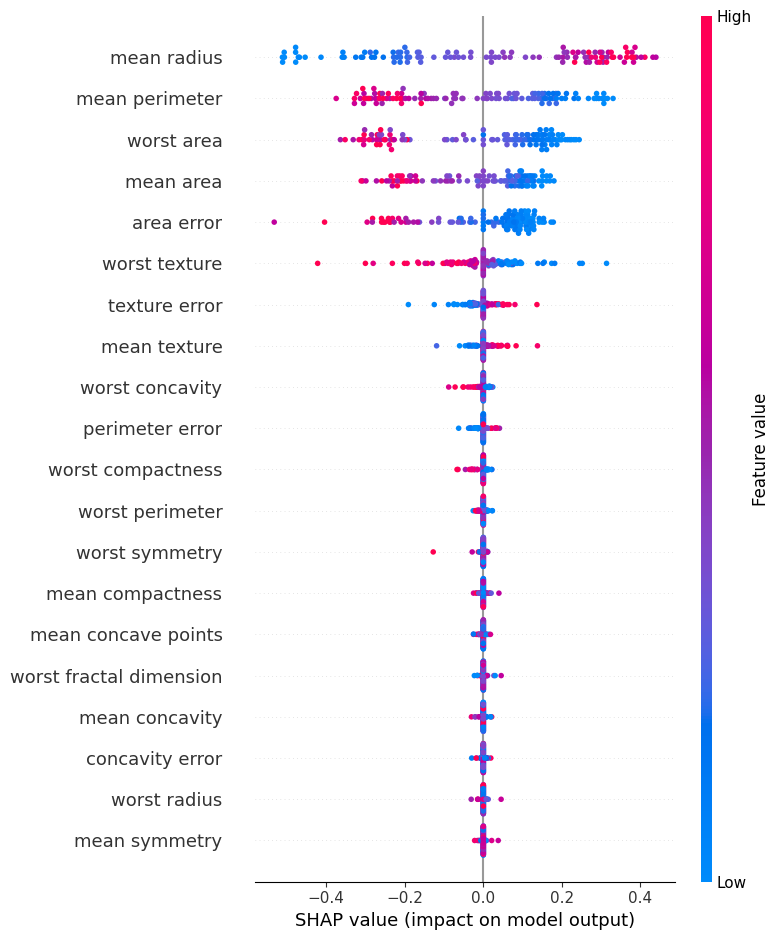

In [36]:
shap.summary_plot(shap_values, X_test, feature_names=data['feature_names'])

In [39]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[5], X_test[5], feature_names=data['feature_names'])

In [45]:
mean_abs_shap_values = np.abs(shap_values).mean(axis=0)

In [46]:
features_names = data['feature_names']
feature_importance = zip(features_names, mean_abs_shap_values)
sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

In [47]:
for feature, importance in sorted_feature_importance:
    print(feature, ':' ,importance )

mean radius : 0.254640630932059
mean perimeter : 0.18012929108516793
worst area : 0.16652947189763084
mean area : 0.1180477909581041
area error : 0.11473744357688569
worst texture : 0.06586146471545602
texture error : 0.022573164630333185
mean texture : 0.014889332544916806
worst concavity : 0.007349084855261488
perimeter error : 0.006676219205923753
worst compactness : 0.0055060167141181005
worst perimeter : 0.004325024469352931
worst symmetry : 0.002432468919921948
mean compactness : 0.002320578009590775
mean concave points : 0.001915308994929538
worst fractal dimension : 0.001816452392551856
mean concavity : 0.0017172073192103362
concavity error : 0.0015039217014562322
worst radius : 0.0014255231391253824
mean symmetry : 0.0013072219116506125
worst concave points : 0.0012698590222159692
mean smoothness : 0.0012052066449689286
radius error : 0.0010725910819946339
mean fractal dimension : 0.0009952844156772126
concave points error : 0.0009845592809773827
symmetry error : 0.00088174836